# Sejarah Bitcoin

Satoshi Nakamota, seorang penemu Bicoin dalam Warmke ([2021](https://doi.org/10.1080/0020174X.2020.1860123)) pada tahun 2009 berkata:

 "Akar permasalahan mata uang konvensional adalah besarnya kepercayaan yang dibutuhkan
untuk membuatnya berfungsi. Bank sentral harus dipercaya untuk tidak melemahkan mata uang,
tetapi sejarah mata uang fiat penuh dengan pelanggaran kepercayaan tersebut. Bank harus
dipercaya untuk menyimpan uang kita dan mentransfernya secara elektronik, tetapi mereka meminjamkannya
dalam gelombang gelembung kredit dengan cadangan yang sangat sediki

Krisis 2008 menjadi awal ketidakpercayaan Satoshi terhadap institusi keuangan seperti perbankan. Satoshi memandang bahwa perbankan bertanggung jawab terhadap terjadinya resesi saat itu karena praktik keuangan yang berisiko dan tidak pruden. Namun, alih-alih ditutup mereka justru diselamatkan oleh pemerintah dengan sistem bailouts (suntikan dana permodalan kepada perbankan yang collaps akibat praktik keuangan). 
Setelah krisis 2008, dunia dihadapkan pada pandemi Covid-19 yang menyebabkan krisis dan depresi ekonomi. Dan lagi, pemerintah mencetak banyak uang untuk menyelamatkan perusahaan-perusahaan bermasalah yang tentunya berdampak pada turunnya nilai mata uang  dan kerugian sosial yang ditanggung rakyat (Warmke, [2021](https://doi.org/10.1080/0020174X.2020.1860123)).

Bitcoin dibuat sebagai alternatif sistem keuangan tanpa bergantung pada bank sentral atau pihak ketiga seperti bank atau kartu kredit (Prasad, [2022](https://doi.org/10.1080/00963402.2022.2087371)). Diperkenalkan pada 2009, di tengah krisis keuangan global, ketika kepercayaan terhadap pemerintah dan lembaga keuangan sangat rendah. Sejak diperkenalkan pada tahun 2009 Bitcoin menjadi mata uang digital paling banyak digunakan dan juga karena aman dan transparan (Chopra & Mehta, [2022](https://doi.org/10.1080/23322039.2022.2156092))

Akan tetapi, beberapa penelitian menyebutkan bahwa Bitcoin gagal berfungsi sebagai alat tukar karena nilainya sangat fluktuatif dan kapasitas transaksinya terbatas. Selain itu, tanpa otoritas pusat, kesalahan transaksi tak bisa dibatalkan, dan aset bisa hilang selamanya jika pengguna lupa kunci pribadinya. Alih-alih menjadi mata uang, bitcoin kini lebih dianggap sebagai aset spekulatif tanpa nilai intrinsik dan nilai tambah (Prasad, [2022](https://doi.org/10.1080/00963402.2022.2087371)), (Rotta & Parana [2022](https://doi.org/10.1080/13563467.2022.2054966)).

Penelitian Stensås, et al ([2019](https://doi.org/10.1080/23322039.2019.1593072)) menyimpulkan bahwa Bitcoin berfungsi sebagai hedge (lindung nilai) di sebagian besar negara berkembang dan sebagai diversifier di negara maju. Mereka juga menyebutkan Bitcoin berperan sangat baik sebagai safe haven asset ketika terjadi gejolak pasar sebagai akibat politik global. Bitcoin bersama emas juga dipandang masih bisa menjadi pelindung nilai yang baik untuk Dollar AS sebelum Covid-19 meskipun kemampuannya menurun setelahnya (Cheng et al, [2024](https://doi.org/10.1080/00036846.2024.2393454))



t."


# Import Library

In [237]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import plotly.express as px

#!pip install prophet yfinance matplotlib pandas
import yfinance as yf
from prophet import Prophet

# Membuka Dataset

In [239]:
#Buka dataset
with zipfile.ZipFile('C:/Users/ACER/Downloads/archive (8).zip') as z:
    print(z.namelist())
    with z.open('Bitcoin_history_data.csv') as f:
        df = pd.read_csv(f)

#Menampilkan 5 rows pertama
df.head()

['Bitcoin_history_data.csv']


,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [240]:
#Cek distribusi data
df.describe()

,Close,High,Low,Open,Volume
count,3964.000000,3964.000000,3964.000000,3964.000000,3.964000e+03
mean,23653.248209,24127.925449,23101.537282,23624.640247,2.002835e+10
std,27809.824318,28305.706106,27228.643913,27772.695777,2.138620e+10
min,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,2315.404907,2409.394958,2205.524963,2312.749939,9.567785e+08
50%,10131.286133,10300.696777,9737.092285,10124.667480,1.610533e+10
75%,37805.366211,38957.791992,36792.520508,37784.743164,3.139787e+10
max,119995.414062,123091.609375,118959.195312,119997.445312,3.509679e+11


In [241]:
#Cek jumlah rows dan kolom
print(f'Jumlah rows:{df.shape[0]}')
print(f'Jumlah columns:{df.shape[1]}')

Jumlah rows:3964
Jumlah columns:6


In [242]:
#Mencari tau rentang waktu atau periode data yang digunakan
print('Start date', df['Date'].min())
print('Finish date', df['Date'].max())

Start date 2014-09-17
Finish date 2025-07-24


Dataset yang digunakan merupakan data time series berjumlah 3964 dengan frekuensi harian dari tanggal 17 September 2014 sampai 24 Juli 2025.

In [244]:
#Membuat fungsi untuk summary data jumlah null dan duplikasi
def summary(df):
    summry = pd.DataFrame(df.dtypes, columns=['data type'])
    summry['missing'] = df.isnull().sum().values
    summry['duplicated'] = df.duplicated().sum()

    return summry

summary(df).style.set_caption("**Summary Data**").\
background_gradient(cmap='Pastel2_r', axis=0). \
set_properties(**{'border': '1.3px dotted', 'color': '', 'caption-side': 'left'})

,data type,missing,duplicated
Date,object,0,0
Close,float64,0,0
High,float64,0,0
Low,float64,0,0
Open,float64,0,0
Volume,int64,0,0


Berdasarkan hasil di atas dapat dilihat bahwa data yang digunakan pada project ini sangat baik karena tidak ada data null (missing) maupun data duplikasi sehingga dapat langsung digunakan.

# Feature Engineering

In [247]:
#Membuat kolom persentase perubahan harga
df['change'] = df['Close'].pct_change() * 100

#Membuat kolom spread untuk menggambarkan volatilitas harga di suatu hari
df['spread'] = np.abs(df['High'] - df['Low'])

#Mengubah data tanggal menjadi datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Buat kolom bulan      
df['month'] = df['Date'].dt.month_name()          

# Exploratory Data Analysis (EDA)

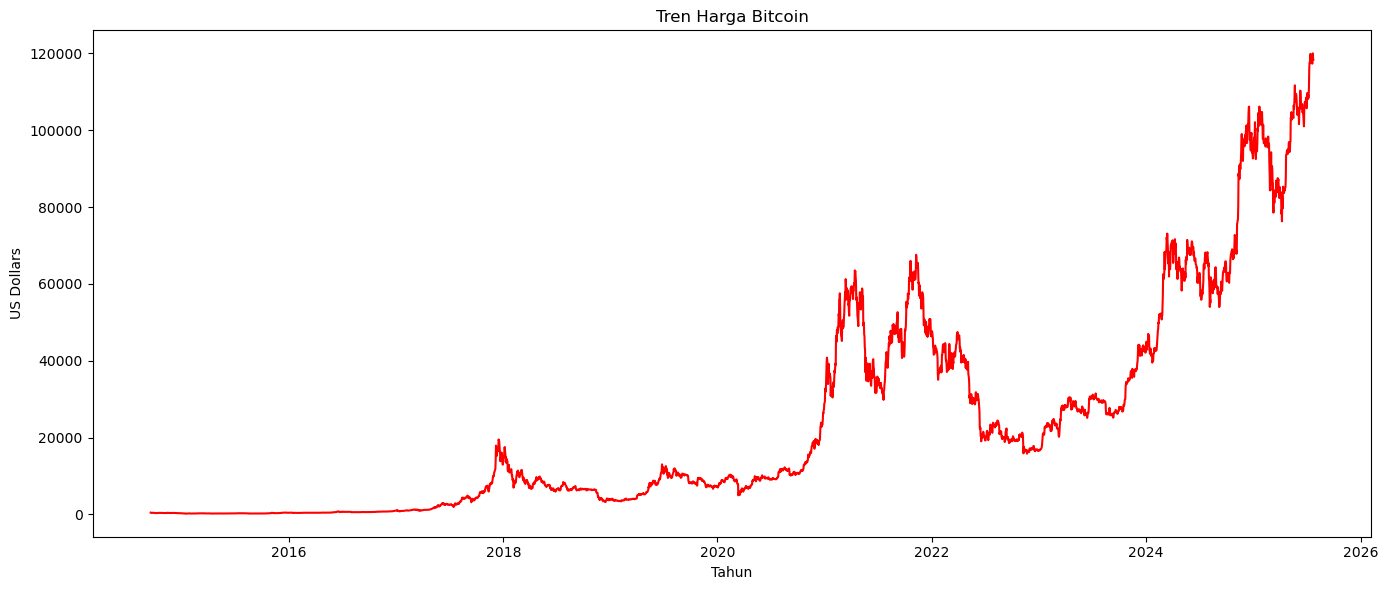

In [249]:
#Ubah kolom date menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

#Visualisasi harga bircoin saat penutupan
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], color='red')
plt.title("Tren Harga Bitcoin")
plt.xlabel("Tahun")
plt.ylabel("US Dollars")
plt.tight_layout()
plt.show()

In [427]:
df['change'].mean()

0.20437374289374174

Harga Bitcoin cenderung selalu naik dalam jangka panjang mulai dari tahun 2014 s.d tahun 2025 dengan rata-rata kenaikan setiap harinya mencapai 0,204%.

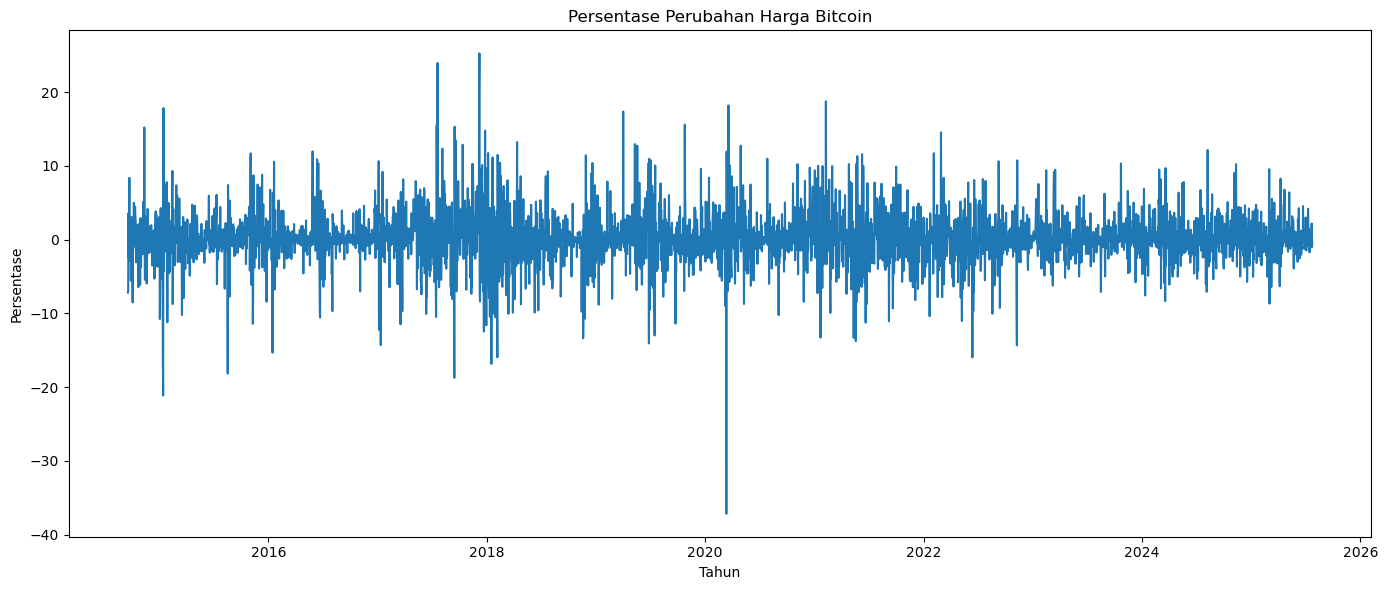

In [250]:
#Visualisasi perubahan harga bircoin saat penutupan
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['change'])
plt.title("Persentase Perubahan Harga Bitcoin")
plt.xlabel("Tahun")
plt.ylabel("Persentase")
plt.tight_layout()
plt.show()

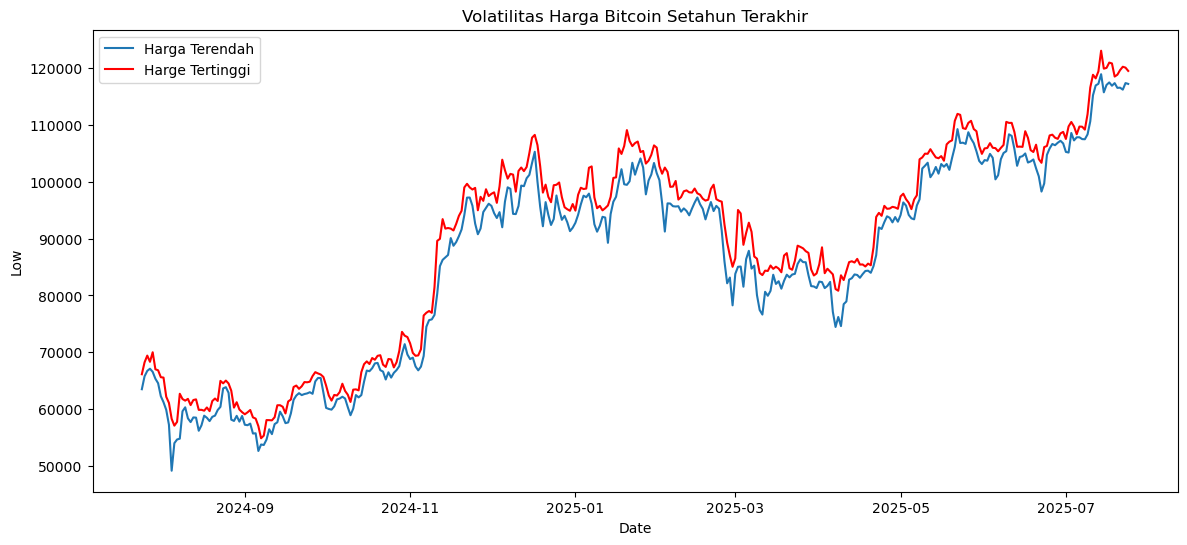

In [251]:
df_last_365 = df.tail(365)

plt.figure(figsize=(14,6))
sns.lineplot(data=df.tail(365), x='Date', y='Low', label='Harga Terendah')
sns.lineplot(data=df.tail(365), x='Date', y='High', color='r', label='Harge Tertinggi')
plt.title('Volatilitas Harga Bitcoin Setahun Terakhir')
#plt.fill_between(
    #df_last_365['Date'],
    #df_last_365['Low'],
    #df_last_365['High'],
    #color='black',
    #alpha=0.5,
    #label='Range (High - Low)'
#)

plt.show()

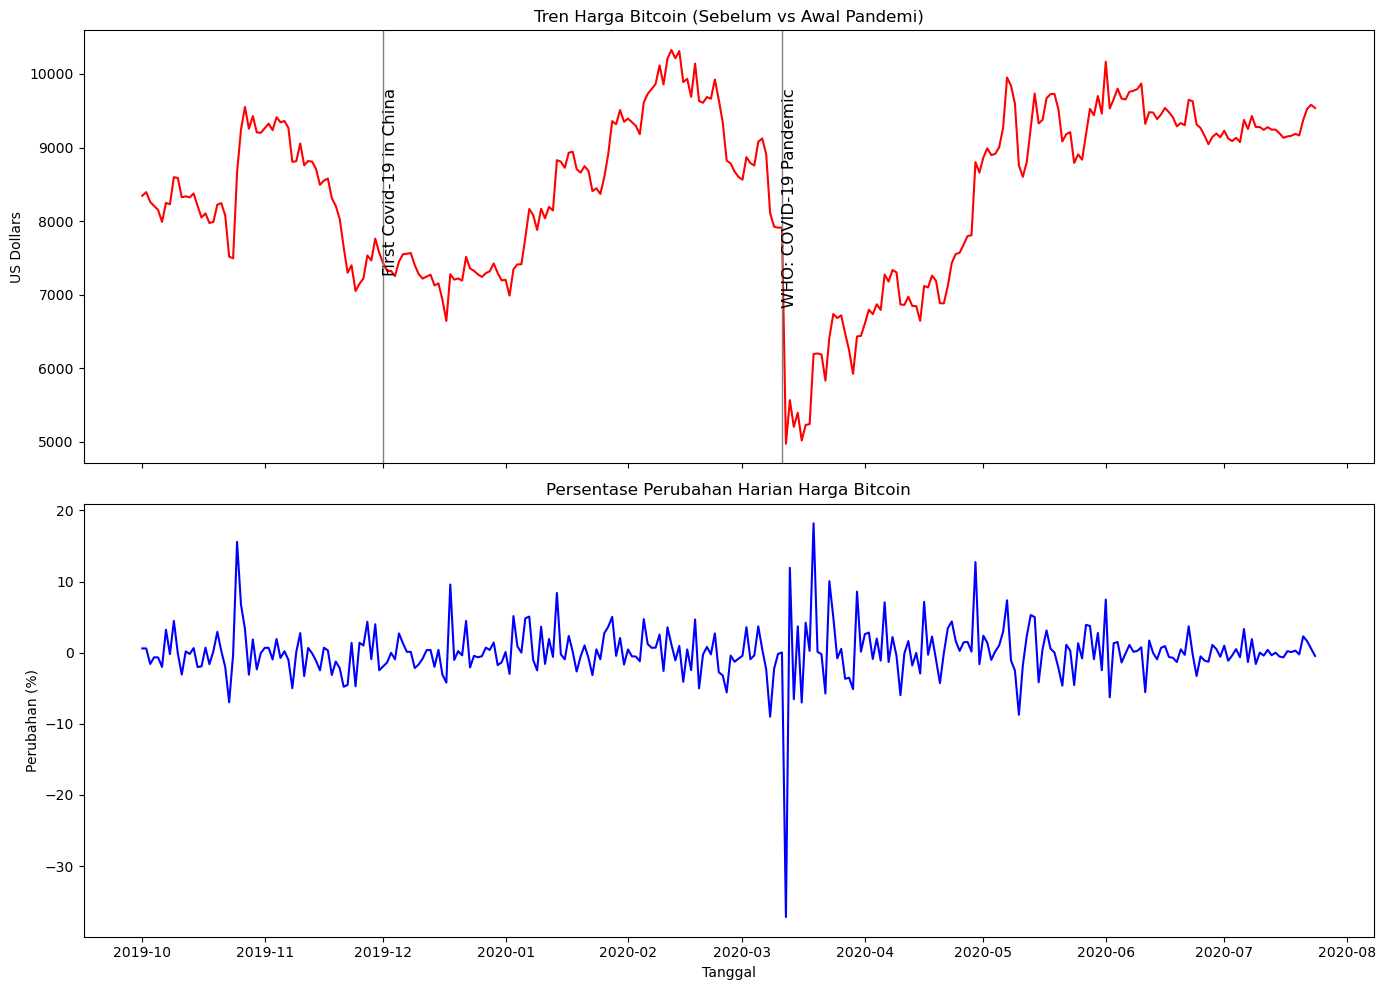

In [252]:
#Filter tanggal
start = '2019-10-01'
end = '2020-07-24'
df_filter = df[(df['Date'] >= start) & (df['Date'] <=end)]

#Buat subplots untuk memvisualisasikan data
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

#Plot Harga Bitcoin
axs[0].plot(df_filter['Date'], df_filter['Close'], color='red', label='Harga Bitcoin')
axs[0].set_title("Tren Harga Bitcoin (Sebelum vs Awal Pandemi)")
axs[0].set_ylabel("US Dollars")

#Menambahkan perwistiwa covid-19
events = {
    '1 Dec 2019': 'First Covid-19 in China',
    '11 March 2020': 'WHO: COVID-19 Pandemic',
    # '12 March 2020': 'Black Thursday',
}
for date_str, label in events.items():
    date = pd.to_datetime(date_str)
    axs[0].axvline(x=date, color='gray', linewidth=1)
    axs[0].text(date, df_filter['Close'].max()*0.95, label,
             rotation=90, verticalalignment='top', fontsize=12, color='black')

#Plot persentase perubahan harga
axs[1].plot(df_filter['Date'], df_filter['change'], color='blue')
axs[1].set_ylabel("Perubahan (%)")
axs[1].set_xlabel("Tanggal")
axs[1].set_title("Persentase Perubahan Harian Harga Bitcoin")

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas terlihat bahwa harga Bitcoin sempat mengalami penurunan yang sangat signifikan pada tanggal 12 Maret 2020. Hal ini dapat terjadi karena secara hampir bersamaan Covid-19 dinyatakan sebagai pandemi global oleh WHO pada tanggal 11 Maret 2020. Adanya deklarasi ini menyebabkan sentimen negatif terhadap pasar Bitcoin global sehingga harga turun sangat jauh. Di sisi lain, temuan pertama kasus Covid-19 di China tidak memberikan dampak yang besar kepada harga Bitcoin sebelumnya.

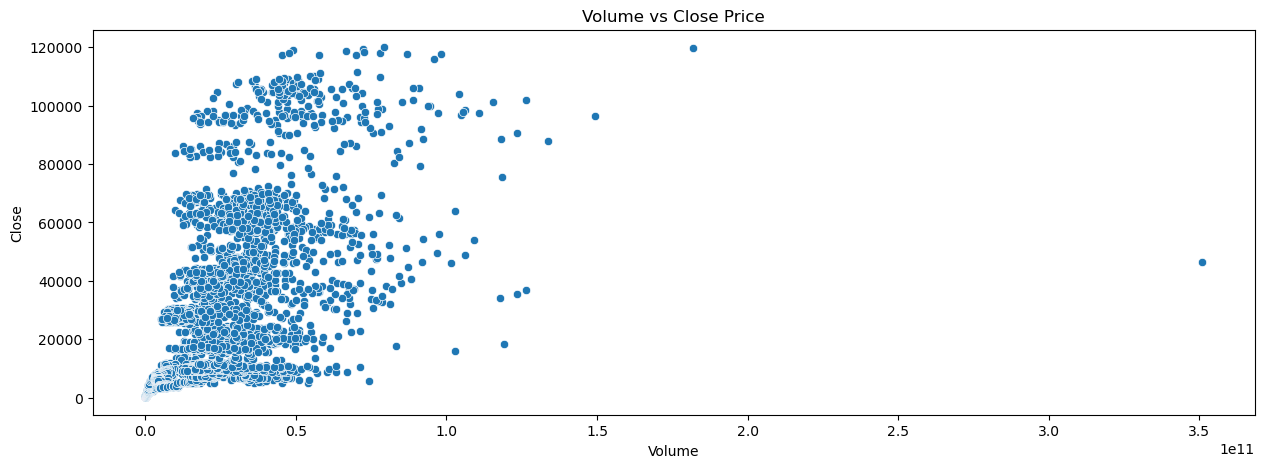

In [253]:
plt.figure(figsize=(15,5))
sns.scatterplot(df, x='Volume', y='Close')
plt.title('Volume vs Close Price')
plt.show()

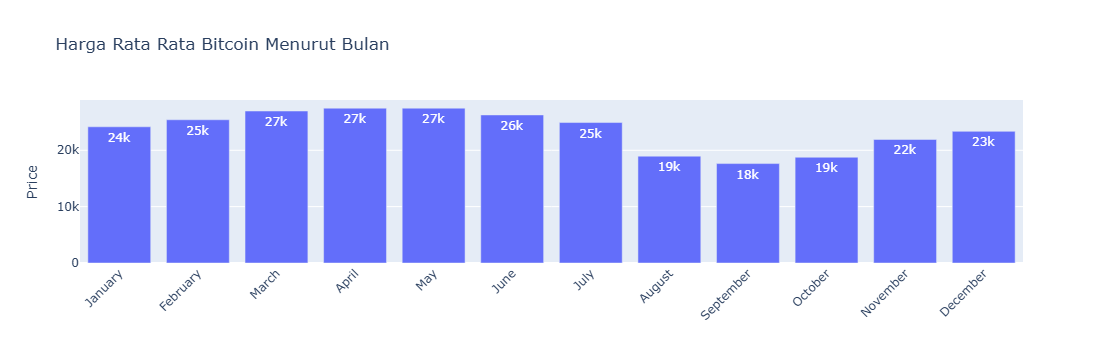

In [432]:
a = df.groupby('month')['Close'].mean()

bulan_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
a = a.reindex(bulan_order)

df_plot = a.reset_index()
df_plot.columns = ['Month', 'Average Close']

fig = px.bar(df_plot, x='Month', y='Average Close',
             title='Harga Rata Rata Bitcoin Menurut Bulan',
             labels={'Month': 'Month', 'Average Close': 'Average Close Price'},
             text_auto='.2s')
fig.update_layout(xaxis_title='', yaxis_title='Price', xaxis_tickangle=-45)
fig.show()

Gambar di atas menunjukkan rata-rata harga Bitcoin. Terlihat bahwa harga mengalami kenaikan rata-rata sampai pada pertengahan tahun (bulan Juni-Juli) kemudian menurun dan mengalami kenaikan kembali pada akhir tahun. Sebuah pola unik yang disebut sebagai fenomena [Santa Rally](https://coinvestasi.com/belajar/mengenal-fenomena-santa-claus-rally-dalam-pasar-kripto), yaitu sebuah kondisi di mana harga mengalami kenaikan menjelang Natal dan Tahun Baru.

# Model Prophet

In [256]:
data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [257]:
model = Prophet()
model.fit(data)

15:20:21 - cmdstanpy - INFO - Chain [1] start processing
15:20:25 - cmdstanpy - INFO - Chain [1] done processing


In [258]:
future = model.make_future_dataframe(periods=60)

In [259]:
forecast = model.predict(future)

D:\anacondaa\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\anacondaa\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



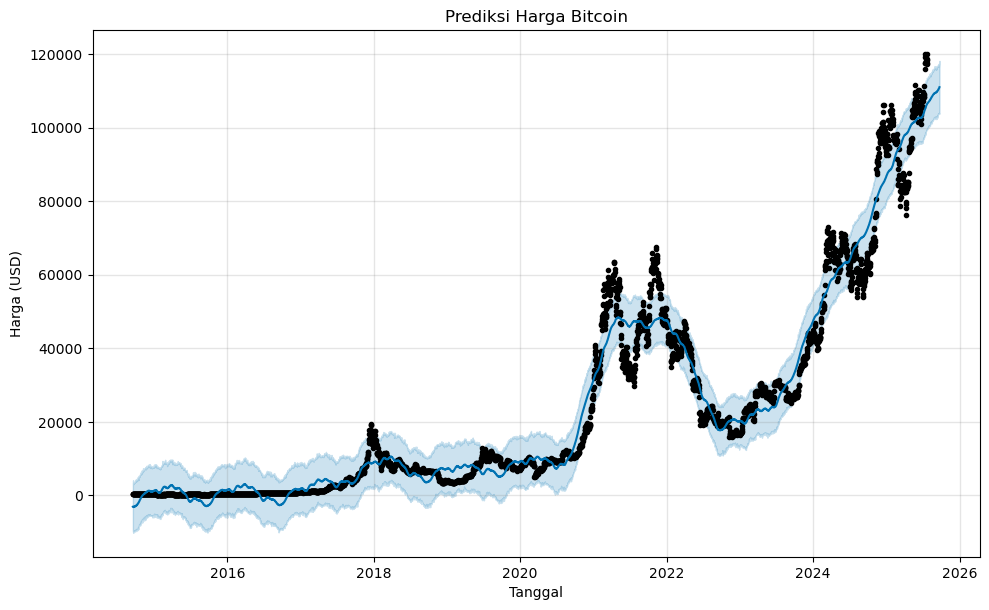

In [260]:
model.plot(forecast)
plt.title('Prediksi Harga Bitcoin')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.show()

In [275]:
data_forecast = forecast[forecast['ds'] > '2025-07-24'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
data_forecast

,ds,yhat,yhat_lower,yhat_upper
3964,2025-07-25,106614.247568,100026.902559,113033.876546
3965,2025-07-26,106685.586089,99821.541977,113361.500280
3966,2025-07-27,106738.673510,100023.225913,113505.797918
3967,2025-07-28,106861.312657,99856.381227,114017.681615
3968,2025-07-29,106884.989763,100433.791229,113782.195323
3969,2025-07-30,107039.525310,100530.719851,113629.267255
3970,2025-07-31,107037.205905,100256.938070,113415.153124
3971,2025-08-01,107100.225233,100500.436764,113850.409050
3972,2025-08-02,107165.101806,100335.071303,114105.382754
3973,2025-08-03,107218.256196,100649.717801,113876.794714


<Axes: xlabel='ds', ylabel='yhat'>

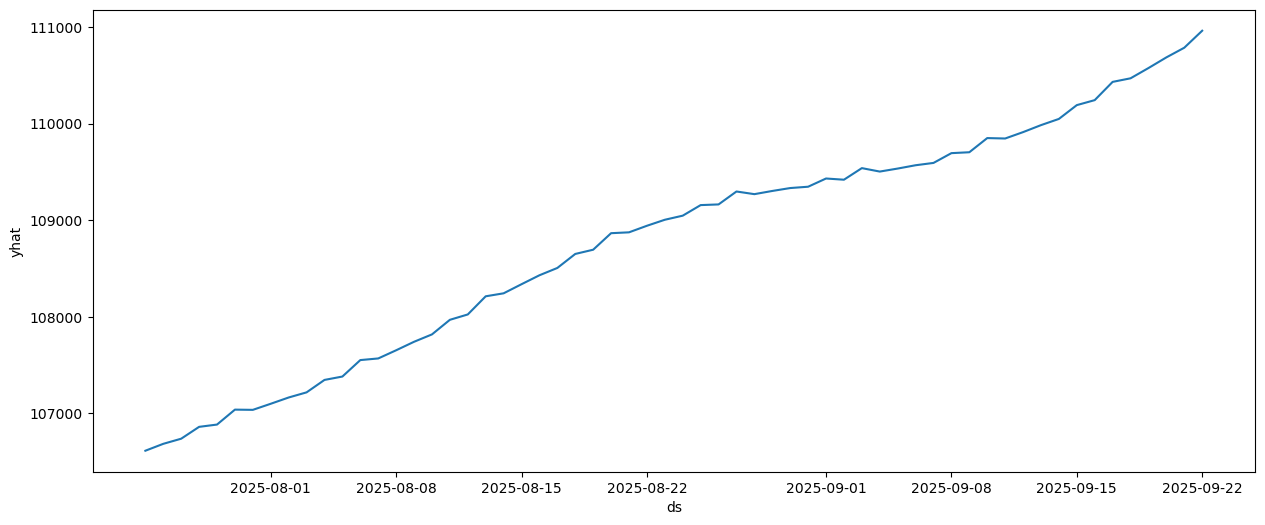

In [283]:
plt.figure(figsize=(15,6))
sns.lineplot(data_forecast, x='ds', y='yhat')

# Evaluasi Model

In [366]:
#Split data menjadi train dan test
train = data.iloc[:-60] 
test = data.iloc[-60:] 

#Fit model menggunakan data training
model = Prophet()
model.fit(train)

#Membuat prediksi ke 60 hari ke depan
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

#Mengambil prediksi yang cocok dengan test set
forecast_test = forecast[-60:]

#Menghitung metrik evaluasi
y_true = test['y'].values
y_pred = forecast_test['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred)

#Hasil evaluasi
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape*100:.2f}%")

15:59:30 - cmdstanpy - INFO - Chain [1] start processing
15:59:33 - cmdstanpy - INFO - Chain [1] done processing


MAE : 9456.98
RMSE: 10497.51
MAPE: 8.46%


In [332]:
forecast[['ds', 'yhat']].tail(60)

,ds,yhat
3904,2025-05-26,98839.643890
3905,2025-05-27,98819.133349
3906,2025-05-28,98925.552609
3907,2025-05-29,98888.125522
3908,2025-05-30,98937.107923
3909,2025-05-31,98964.759215
3910,2025-06-01,98976.084206
3911,2025-06-02,99033.520630
3912,2025-06-03,99035.033550
3913,2025-06-04,99160.196509


In [324]:
df[['Date', 'Close']].tail(60)

,Date,Close
3904,2025-05-26,109440.367188
3905,2025-05-27,108994.640625
3906,2025-05-28,107802.328125
3907,2025-05-29,105641.757812
3908,2025-05-30,103998.570312
3909,2025-05-31,104638.093750
3910,2025-06-01,105652.101562
3911,2025-06-02,105881.531250
3912,2025-06-03,105432.468750
3913,2025-06-04,104731.984375


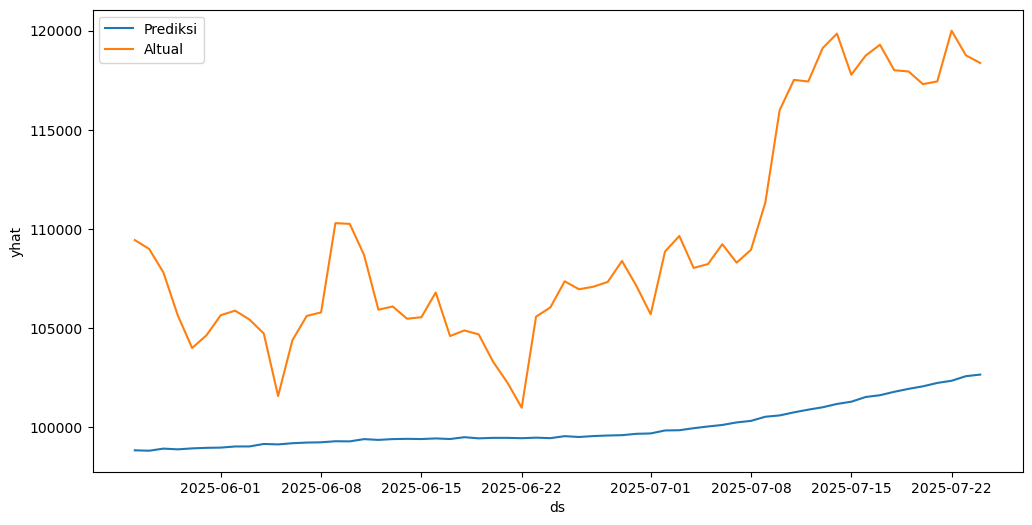

In [370]:
plt.figure(figsize=(12,6))
sns.lineplot(y=forecast[['ds', 'yhat']].tail(60)['yhat'], x=forecast[['ds', 'yhat']].tail(60)['ds'], label='Prediksi')
sns.lineplot(y=df[['Date', 'Close']].tail(60)['Close'], x=df[['Date', 'Close']].tail(60)['Date'], label='Altual')
plt.show()

In [346]:
gabung = pd.merge(forecast[['ds', 'yhat']].tail(60), df[['Date', 'Close']].tail(60), left_on='ds', right_on='Date', how='inner')

In [360]:
gabung['Error'] =  np.abs(gabung['Close'] - gabung['yhat'])
gabung

,ds,yhat,Date,Close,Error
0,2025-05-26,98839.643890,2025-05-26,109440.367188,10600.723297
1,2025-05-27,98819.133349,2025-05-27,108994.640625,10175.507276
2,2025-05-28,98925.552609,2025-05-28,107802.328125,8876.775516
3,2025-05-29,98888.125522,2025-05-29,105641.757812,6753.632291
4,2025-05-30,98937.107923,2025-05-30,103998.570312,5061.462390
5,2025-05-31,98964.759215,2025-05-31,104638.093750,5673.334535
6,2025-06-01,98976.084206,2025-06-01,105652.101562,6676.017357
7,2025-06-02,99033.520630,2025-06-02,105881.531250,6848.010620
8,2025-06-03,99035.033550,2025-06-03,105432.468750,6397.435200
9,2025-06-04,99160.196509,2025-06-04,104731.984375,5571.787866


In [418]:
gabung.to_csv('C:/Users/ACER/Downloads/hasil_forecast.csv', index=False)

# Kesimpulan

1. MAE (Mean Absolute Error): 9.456,98
   - Rata-rata selisih absolut antara nilai prediksi dan nilai aktual adalah sekitar Rp9.456,98
   - Metrik ini menunjukkan seberapa besar kesalahan rata-rata tanpa memperhatikan arah (positif/negatif)
2. RMSE (Root Mean Squared Error): 10.497,51
   - Akar dari rata-rata kuadrat kesalahan prediksi adalah sekitar Rp10.497,51
   - Lebih sensitif terhadap kesalahan besar (outlier) dibanding MAE
3. MAPE (Mean Absolute Percentage Error): 8,46%
   - Rata-rata kesalahan prediksi dalam bentuk persentase adalah 8,46%
   - Nilai 8,46% berarti: Rata-rata prediksi harga Bitcoin melenceng sekitar 8,46% dari nilai sebenarnya.
   - MAPE sebesar 8,46% sudah cukup bagus untuk prediksi jangka panjang pada pasar Bitcoin yang volatil tetapi tidak jadi pilihan baik jika ingin memprediksi harga harian dengan lebih presisi.

# Saran

Perlu mengembangkan model bivariate untuk membandingkan performa dengan model Prophet. Pada model bivariate dapat memasukkan variabel-variabel eksternal yang memengaruhi volatilitas harga Bitcoin seperti kondisi politik, harga minyak dunia, dll.